In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r"/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/OneDrive/Documents/UNSW DATA SCIENCE/Term 3 2020/Data3001 Data Science In Prac/combined_energy.csv")

In [5]:
data = data[data["REGIONID"] != "TAS1"]
data = data[data["REGIONID"] != "SNOWY1"]

In [6]:
# Drop RRP & ROC because we will use RRP5min & ROP5min\
data.drop(["RRP", "ROP", "ROP5min"], axis = 1, inplace = True)

In [7]:
# BELOW WE FOUND THAT LOG PRICES ARE BETTER
data["logPrice"] = np.log(data["RRP5min"])

data["SETTLEMENTDATE"] = pd.to_datetime(data["SETTLEMENTDATE"])
data["year"] = data["SETTLEMENTDATE"].dt.year
data["month"] = data["SETTLEMENTDATE"].dt.to_period("M")
data["day"] = data["SETTLEMENTDATE"].dt.to_period("D")

# Seperating data for each region
region = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']
dataNSW = data[data["REGIONID"] == "NSW1"]
dataQLD = data[data["REGIONID"] == "QLD1"]
dataSA = data[data["REGIONID"] == "SA1"]
dataTAS = data[data["REGIONID"] == "TAS1"]
dataVIC = data[data["REGIONID"] == "VIC1"]
dataset = [dataNSW, dataQLD, dataSA, dataTAS, dataVIC]

########## SNOW1 is an unknown region entry. No such region exists. Only 1 row so we drop ##############

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
monthly_price_avg = pd.DataFrame(dataSA.groupby("month")["RRP5min"].mean())
monthly_price_avg.index = monthly_price_avg.index.astype(str)

Text(0.5, 1.0, 'Price Pattern Over Time')

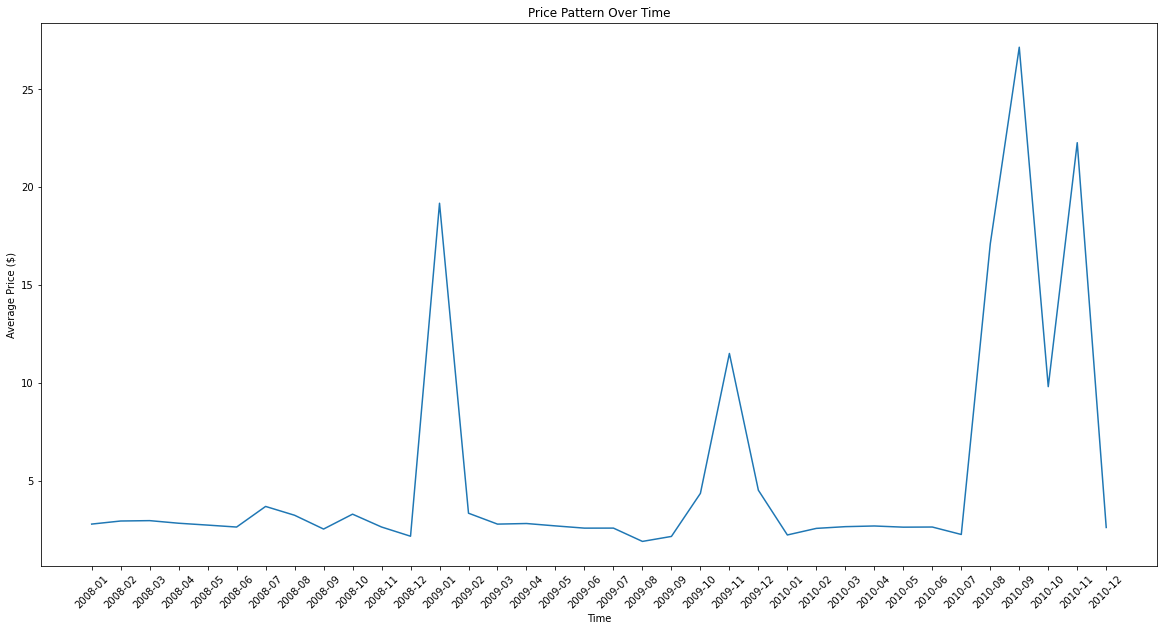

In [7]:
import matplotlib.pyplot as plt
# NO TREND IN PRICE OVER TIME BUT SEASONALITY CLEARLY SEEN
# Peaks at end of the year
# AVG Prices over month
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(monthly_price_avg)
plt.xlabel("Time")
plt.ylabel("Average Price ($)")
plt.title("Price Pattern Over Time")

In [8]:
price = dataSA[["SETTLEMENTDATE","RRP5min"]]
price.index = dataSA["SETTLEMENTDATE"]
price.drop(columns="SETTLEMENTDATE", inplace=True)
price

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,RRP5min
SETTLEMENTDATE,
2008-01-07 00:00:00,2.480860
2008-01-07 00:05:00,2.475000
2008-01-07 00:10:00,2.475000
2008-01-07 00:15:00,2.475000
2008-01-07 00:20:00,2.475000
...,...
2010-06-29 03:50:00,1.606734
2010-06-29 03:55:00,1.575924
2010-06-29 04:00:00,1.600646


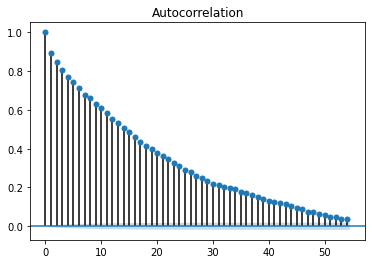

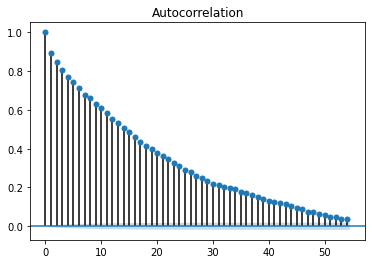

In [9]:
# Shows RRP5min not stationary 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(price)

In [10]:
#Integrated of order 1
price_diff = price.diff(periods=1)
price_diff = price_diff[1:]
price_diff

,RRP5min
SETTLEMENTDATE,
2008-01-07 00:05:00,-0.005860
2008-01-07 00:10:00,0.000000
2008-01-07 00:15:00,0.000000
2008-01-07 00:20:00,0.000000
2008-01-07 00:25:00,0.000000
...,...
2010-06-29 03:50:00,0.012517
2010-06-29 03:55:00,-0.030810
2010-06-29 04:00:00,0.024722


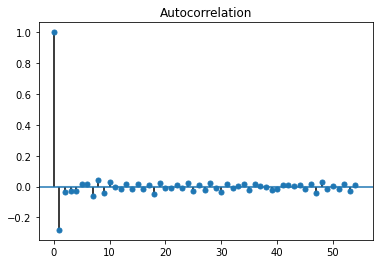

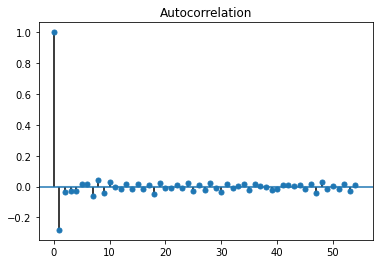

In [11]:
# Int of order 1 is stationary
plot_acf(price_diff)

In [12]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [13]:
X = price.values
train = X[0:200001]
test = X[200001:]
predictions = []

In [14]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Future

In [15]:
predictions = model_ar_fit.predict(start=200001, end=209714)

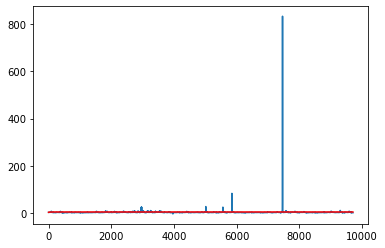

In [16]:
plt.plot(test)
plt.plot(predictions, color='Red')

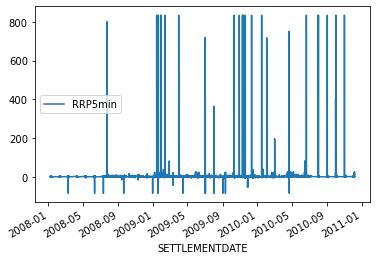

In [17]:
price.plot()

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
model_arima = ARIMA(train,order=(3,1,1))

In [ ]:
model_arima_fit = model_arima.fit()

In [1]:
###########################################
########## LINEAR REG #################
#######################################

In [8]:
X = dataSA["TOTALDEMAND"]

In [21]:
X

NameError: name 'X' is not defined

In [20]:
import pandas as pd
import numpy as np

In [23]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)), columns=['test', 'predictions'])

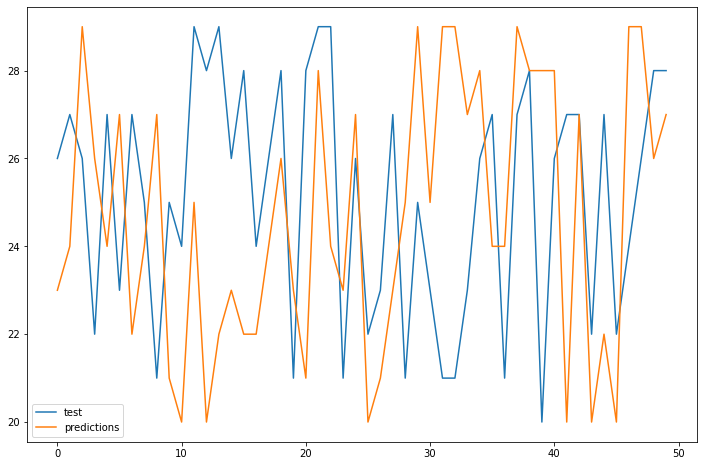

In [25]:
df.plot(figsize=(12,8))

In [26]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [27]:
month_plot(new["RRP5min"]);

NameError: name 'new' is not defined